In [1]:
import tensorflow as tf
import prepare_data 
import RNN_model
import train_test

--------------------------------------------------
Loading 'processed_data.pkl'

--------------------------------------------------
Extracting X1, X2, Y from 'processed_data.pkl' (circle = 5)
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [00:27<00:00,  4.48it/s]


total num of samples: 19571

--------------------------------------------------
Normalizing X1, X2, Y to 0~1
--------------------------------------------------
		 Tdlin 		 Qdlin 		 Vdlin
X1_min: [ 0.       20.900028  2.      ]
X1_max: [ 1.5279601  43.10046953  3.5       ]

		 Discharge_time 	 IR 	 QD
X2_min: [6.28092333 0.         0.88099587]
X2_max: [2.41972717e+01 2.32214690e-02 2.88408450e+00]

Y_min: 16 	Y_max 2241

--------------------------------------------------
Spliting samples into train, val, test
--------------------------------------------------
split ratio: [0.8, 0.1, 0.1]
Train:Val:Test = 15656:           1957:1958
Saving to train_val_test_5.npz...

--------------------------------------------------
Sahpe of Train
--------------------------------------------------
X1_train Shape: (15656, 5, 1000, 3)
X2_train Shape: (15656, 5, 3)
Y_train Shape: (15656, 1)
(None, 1)
Model: "model"
_________________________________________________________________
Layer (type)               

INFO:tensorflow:Assets written to: circle_5/model/1\assets


INFO:tensorflow:Assets written to: circle_5/model/1\assets


Y_test.shape (15656, 1)
yhat.shape (15656, 1)
Y_test.shape (1957, 1)
yhat.shape (1957, 1)
Y_test.shape (1958, 1)
yhat.shape (1958, 1)
              mae        rmse      mape        r2
train  114.759837  188.914680  0.246706  0.757817
val    112.654980  185.659317  0.240387  0.767194
test   114.168251  185.243060  0.252344  0.752708


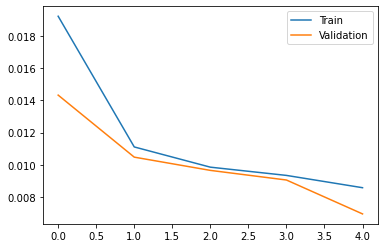

In [2]:
data_config = dict(
    split_ratio=[0.8, 0.1, 0.1],
    n = 5,
    resample_step = 10,
    resample_method = 'first',
    reshape_x1_method = 'circle to row',
    # reshape_x1_method = 'circle to col',
    )

# Define the model paras
model_config = dict(
    model_name = '',
    model_type = 'm1',
    # model_type = 'Bi_LSTM',
    networks = 'Bi_LSTM',
    epochs=5,
    batch_size=64,
    rnn_units= [512],
    dropout_rate=0.1,
    attention_units=0,
    dense_units = 300,
    shuffle=True,
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    patience=100,
)
# create dir to save model
prepare_data.create_new_dir(data_config, model_config)

model_config['model_name'] = prepare_data.generate_model_name(data_config, model_config)

# create xy data from processed_data.pkl
train, val, test, norm_paras = prepare_data.create(n = data_config['n'],
                                                    split_ratio=data_config['split_ratio'])

# OR load xy data
# train, val, test, norm_paras = retrieve_train_val_test(data_config)

X1_train, X2_train, Y_train, data_names_train = train
X1_val, X2_val, Y_val, data_names_val = val
X1_test, X2_test, Y_test, data_names_test = test
# del train, val, test

X_train, X_val, X_test = prepare_data.prepare_x(X1_train, X1_val, X1_test, 
                                    X2_train, X2_val, X2_test, 
                                    data_config, model_config)

# build model
model = RNN_model.build_model_1(X_train, Y_train, model_config)

data_xy = (X_train, Y_train, X_val, Y_val, X_test, Y_test)

# train model, save, plot loss, plot model
train_test.fit_model(model, data_xy, model_config, data_config)

train_test.evaluate(model, data_xy, data_names_test, data_config, model_config, norm_paras)

In [3]:
print('X_train.shape:',X_train.shape, '\tY_train.shape:',Y_train.shape)
print('X_val.shape:',X_val.shape, '\tY_val.shape:',Y_val.shape)
print('X_test.shape:',X_test.shape, '\tY_train.shape:',Y_test.shape)

X_train.shape: (15656, 5, 303) 	Y_train.shape: (15656, 1)
X_val.shape: (1957, 5, 303) 	Y_val.shape: (1957, 1)
X_test.shape: (1958, 5, 303) 	Y_train.shape: (1958, 1)


(None, 5, 303)
*   None: # samples
*   5: # circles
*   303: (1000/10) + (1000/10) + (1000/10) + 3 <br>
> For each cycle, 3 series (V, Q, T, each 1000), resample by freq 10 <br>
> For each cycle, 3 scalar (Discharge_time, IR, QD)

In [ ]:
# Train and test in one fucntion
train_test.train_and_eval(data_config, model_config)

increase `epochs` to about 1000, the `MAPE` will be about 10%. <br>
Import `Attention` , the `MAPE` will decrease to about 7%